In [1]:
# Import required libraries
import numpy as np
import hvplot.pandas
from pathlib import Path
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read the sales data
file_path = Path("feed.csv")
feed_df = pd.read_csv(file_path)
feed_df = feed_df.drop(columns=['date'])
feed_df.head(3)

,Unnamed: 0,price,setcode,rare,mythic,uncommon,common,angel,human,zombie,day_int
0,0,778.72,WAR,69,21,102,120,2,17,25,0
1,1,942.95,WAR,69,21,102,120,2,17,25,1
2,2,842.37,WAR,69,21,102,120,2,17,25,2


In [3]:
num_df = pd.get_dummies(feed_df['setcode'])
for i in num_df:
    num_df[i] = num_df[i].replace([False], 0)
    num_df[i] = num_df[i].replace([True], 1)
num_df.head(3)

,KHM,MID,NEO,VOW,WAR,XLN
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0


In [4]:
frames = [num_df, feed_df]
result = pd.concat(frames, axis =1)
feed_df = result.drop(columns=['setcode'])
feed_df = feed_df.drop(columns=['Unnamed: 0'])
feed_df.head(3)

,KHM,MID,NEO,VOW,WAR,XLN,price,rare,mythic,uncommon,common,angel,human,zombie,day_int
0,0,0,0,0,1,0,778.72,69,21,102,120,2,17,25,0
1,0,0,0,0,1,0,942.95,69,21,102,120,2,17,25,1
2,0,0,0,0,1,0,842.37,69,21,102,120,2,17,25,2


In [5]:
test_df = feed_df.loc[feed_df['WAR'] == 1]
feed_df = feed_df.drop(test_df.index[15:1660])
actual = list(test_df['price'])
test_df = test_df.drop(columns=['price'])
test_df


,KHM,MID,NEO,VOW,WAR,XLN,rare,mythic,uncommon,common,angel,human,zombie,day_int
0,0,0,0,0,1,0,69,21,102,120,2,17,25,0
1,0,0,0,0,1,0,69,21,102,120,2,17,25,1
2,0,0,0,0,1,0,69,21,102,120,2,17,25,2
3,0,0,0,0,1,0,69,21,102,120,2,17,25,3
4,0,0,0,0,1,0,69,21,102,120,2,17,25,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1655,0,0,0,0,1,0,69,21,102,120,2,17,25,1655
1656,0,0,0,0,1,0,69,21,102,120,2,17,25,1656
1657,0,0,0,0,1,0,69,21,102,120,2,17,25,1657
1658,0,0,0,0,1,0,69,21,102,120,2,17,25,1658


In [6]:
feed_df['price'] = feed_df.price.round()
feed_df['price'] = feed_df['price'].astype('Int64')

In [7]:
# set machine targets and traininging vlues
y = feed_df['price']
X = feed_df.drop(columns=['price'])
print(X.shape, y.shape)

(5463, 14) (5463,)


In [8]:
# seperate test / train data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1)

In [9]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs', random_state=1)
classifier

LogisticRegression(random_state=1)

In [10]:
# Train the data
classifier.fit(X_train, y_train)

C:\Users\fumev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

In [11]:
# Score the model
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.0507688552599463
Testing Data Score: 0.04685212298682284


In [12]:
# Predict outcomes for test data set and show the pecentage off 
predictions = classifier.predict(X_test)
df_percent = pd.DataFrame({"Prediction": predictions, "Actual": y_test})
df_percent['Percentage'] = (df_percent['Actual'] / df_percent['Prediction'] * 100 -100).round(2)
nonegs = []
for i in df_percent['Percentage']:
    if i >= 0:
        nonegs.append(i)
    if i < 0:
        i = i * -1
        nonegs.append(i)
df_percent['Percentage2'] = nonegs
df_percent.head(3)

,Prediction,Actual,Percentage,Percentage2
2334,258.0,219,-15.12,15.12
2891,241.0,263,9.13,9.13
6386,283.0,280,-1.06,1.06


In [13]:
#breakthis

In [14]:
 # calculate the average percent error 
avg=  df_percent['Percentage2'].mean()
print(f'the average error is {avg}')

the average error is 9.001076134699852


In [15]:
# Make Predictions for every column in  the sales df save to csv for graphing
predictions = classifier.predict(X)
price_prediction = feed_df
price_prediction["Predictions"] = predictions
price_prediction.to_csv('resources\prediction_mb1.csv')
price_prediction.head(3)

,KHM,MID,NEO,VOW,WAR,XLN,price,rare,mythic,uncommon,common,angel,human,zombie,day_int,Predictions
0,0,0,0,0,1,0,779,69,21,102,120,2,17,25,0,228.0
1,0,0,0,0,1,0,943,69,21,102,120,2,17,25,1,228.0
2,0,0,0,0,1,0,842,69,21,102,120,2,17,25,2,228.0


In [16]:
 ############Make Prediction for new data machine was givin first two weeks data time to predict its 25 weeks

In [17]:
# Make predictions with new data
new_prediction = classifier.predict(test_df)
new_df = pd.DataFrame({'price': new_prediction})
actual_df = pd.DataFrame({'price': actual})
test_df["Price Prediction"] = new_df['price']
test_df["actual"] = actual_df['price']
test_df.head(25)

,KHM,MID,NEO,VOW,WAR,XLN,rare,mythic,uncommon,common,angel,human,zombie,day_int,Price Prediction,actual
0,0,0,0,0,1,0,69,21,102,120,2,17,25,0,228.0,778.72
1,0,0,0,0,1,0,69,21,102,120,2,17,25,1,228.0,942.95
2,0,0,0,0,1,0,69,21,102,120,2,17,25,2,228.0,842.37
3,0,0,0,0,1,0,69,21,102,120,2,17,25,3,228.0,875.03
4,0,0,0,0,1,0,69,21,102,120,2,17,25,4,228.0,829.61
5,0,0,0,0,1,0,69,21,102,120,2,17,25,5,228.0,864.61
6,0,0,0,0,1,0,69,21,102,120,2,17,25,6,228.0,822.31
7,0,0,0,0,1,0,69,21,102,120,2,17,25,7,228.0,785.76
8,0,0,0,0,1,0,69,21,102,120,2,17,25,8,228.0,703.83
9,0,0,0,0,1,0,69,21,102,120,2,17,25,9,228.0,719.73


In [18]:
#save to csv
test_df.to_csv('resources\mb1VOW-pre.csv')

<function matplotlib.pyplot.show(close=None, block=None)>

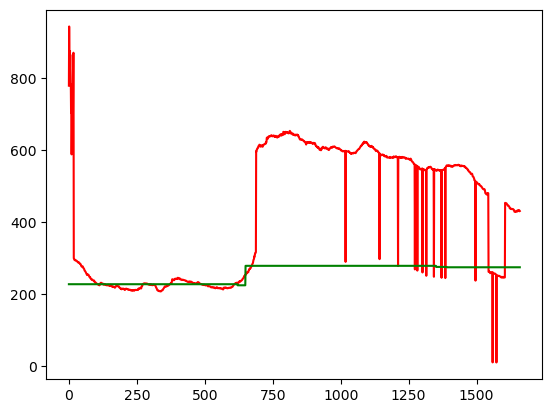

In [19]:
plt.plot(test_df['day_int'], test_df['actual'], color='red', label='actual')
plt.plot(test_df['day_int'], test_df['Price Prediction'], color='green', label='Machine b1')
plt.show

In [20]:
def graph(x):
    khm = price_prediction.loc[price_prediction[x] == 1]
    plt.plot(khm['day_int'], khm['price'], color='red', label='actual')
    plt.plot(khm['day_int'], khm['Predictions'], color='green', label='Machine b1')
    plt.title(f'{x} Data')
    plt.show

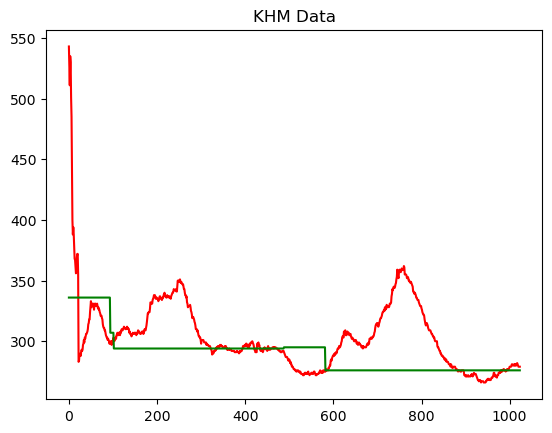

In [21]:
graph('KHM')

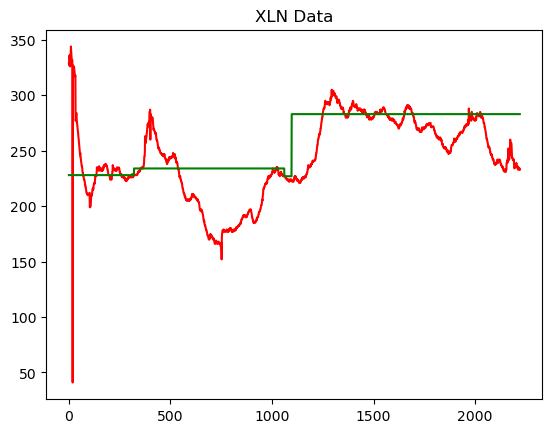

In [22]:
graph('XLN')

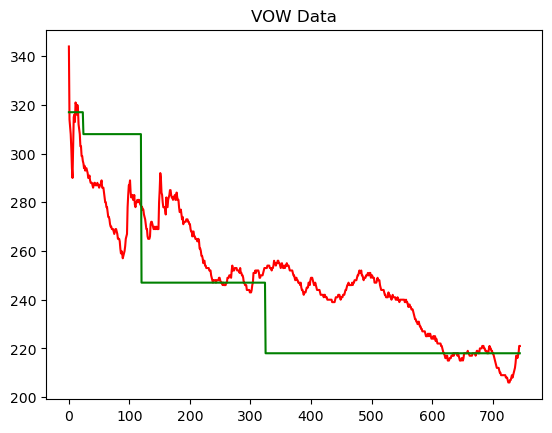

In [23]:
graph('VOW')

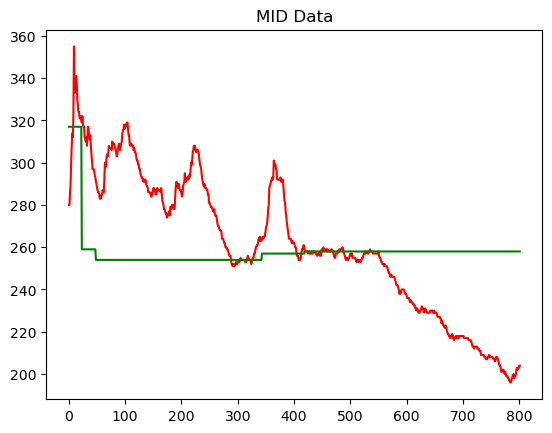

In [24]:
graph('MID')

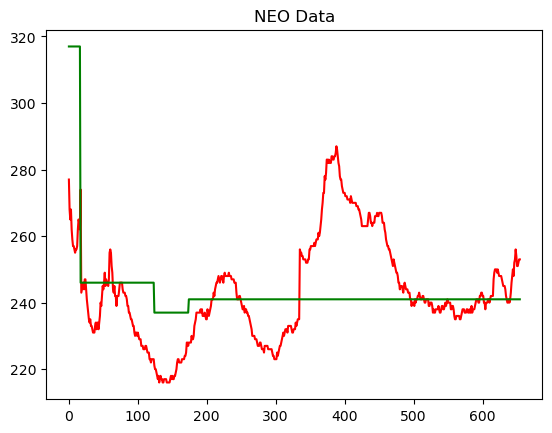

In [25]:
graph("NEO")